# Numerik Vorlesung - Algorithmen in Python

## Allgemeine Vorbereitungen & Annahmen

In [4]:
# Python
import math
import numpy as np
from scipy.linalg import blas as BLAS
import matplotlib.pyplot as plt

### Inplace vs Not Inplace

Soweit möglich wird alles Inplace umgesetzt. Falls ein Algorithmus nicht Inplace durchgeführt wird, wird das in der Dokumentation vermerkt.

## Korrektheitüberprüfungen

viele Algorithmen setzen bestimmte Inputs vorraus. In diesem Skript wird nicht die Korrektheit der Eingabedaten überprüft.
Bei Umsetzungen die über Experimente hinaus gehen sollten die Eingabedaten immer überprüft werden.

## Kapitel 2 Substitutionen & BLAS

### Substitutionen

Berechne Lineare Gleichungssysteme mit einer Dreiecksmatrix. Der Aufwand beläuft $\frac{1}{2}n^2$ Multiplikationen.

In [5]:
# Vorwärtssubstitution, reine Python Variante
# In: untere unipotente Dreiecksmatrix A und Vektor b
# Out: speichert Werte x in b
def voerwarts_substitution(A, b):
  n = b.size
  x = b
  for i in range(1, n):
    for j in range(0, i):
      x[i] = x[i] - A[i, j] * x[j]

# Beispiel
sample_A = np.array([[1., 0., 0.], [1., 1., 0.], [1., 3., 1.]])
sample_b = np.array([4., 2., 3.])
voerwarts_substitution(sample_A, sample_b)
print(f"Vorwärtssubstitution ergibt: A*{sample_b} = b")

Vorwärtssubstitution ergibt: A*[ 4. -2.  5.] = b


Die Vorwärtssubstitution kann aber auch mit BLAS Funktionen umgesetzt werden

In [6]:
# Vorwärtssubstitution mit axpy
# In: untere unipotente Dreiecksmatrix A und Vektor b
# Out: speichert Werte x in b
def voerwarts_substitution_axpy(A, b):
  n = b.size
  x = b
  for j in range(0, n-1):
    x[j+1:n] = BLAS.daxpy(a=-x[j], x=A[j+1:n, j], y=x[j+1:n])

# Vorwärtssubstitution mit dot
# In: untere unipotente Dreiecksmatrix A und Vektor b
# Out: speichert Werte x in b
def voerwarts_substitution_dot(A, b):
  n = b.size
  x = b
  for i in range(1, n):
    x[i] = x[i] - BLAS.ddot(A[i, 0:i], x[0:i])

# Beispiel für axpy
sample_A = np.array([[1., 0., 0.], [1., 1., 0.], [1., 3., 1.]])
sample_b = np.array([4., 2., 3.])
voerwarts_substitution_axpy(sample_A, sample_b)
print(f"Vorwärtssubstitution mit axpy ergibt: A*{sample_b} = b")

# Beispiel für dot
sample_A = np.array([[1., 0., 0.], [1., 1., 0.], [1., 3., 1.]])
sample_b = np.array([4., 2., 3.])
voerwarts_substitution_dot(sample_A, sample_b)
print(f"Vorwärtssubstitution mit dot ergibt: A*{sample_b} = b")

Vorwärtssubstitution mit axpy ergibt: A*[ 4. -2.  5.] = b
Vorwärtssubstitution mit dot ergibt: A*[ 4. -2.  5.] = b


Für obere Dreiecksmatritzen gibt es die Rückwärtssubstitution

In [7]:
# Rückwärtssubstitution
# In: obere Dreiecksmatrix A mit Diagonaleinträgen ≠ 0 und Vektor b
# Out: speichert Werte x in b
def rueckwaerts_substitution(A, b):
  n = b.size
  x = b
  for i in range(n-2, -1, -1): # 
    for j in range(i+1, n):
      x[i] = x[i] - A[i, j] * x[j]
    x[i] = x[i] / A[i, i]

# Beispiel für axpy
sample_A = np.array([[2., 3., 1.], [0., 2., 1.], [0., 0., 1.]])
sample_b = np.array([4., 2., 3.])
rueckwaerts_substitution(sample_A, sample_b)
print(f"Rückwärtssubstitution ergibt: A*{sample_b} = b")

Rückwärtssubstitution ergibt: A*[ 1.25 -0.5   3.  ] = b


## BLAS Algorithmen in Python umgesetzt

In [8]:
# Matrix Vektor Multiplikation gemv (Nicht Inplace)
# In: Matrix A, Vektor v
# Out: Matrix w
def matrix_vektor_mult(A, v):
  n = v.size
  w = np.zeros(n)
  for i in range(0, n):
    for j in range(0, n):
      w[i] = w[i] +  A[i, j] * v[j]
  return w

# Beispiel
sample_A = np.array([[1., 1.], [1., 2.]])
sample_v = np.array([1., 3.])
print(f"Matrix Vektor Multiplikation ergibt Av = {matrix_vektor_mult(sample_A, sample_v)}")

Matrix Vektor Multiplikation ergibt Av = [4. 7.]


In [9]:
# Matrix Matrix Multiplikation gemm (Nicht Inplace)
# In: Matrix A, Matrix B
# Out: Matrix C
def matrix_matrix_mult(A, B):
  n = A.shape[0]
  C = np.zeros((n, n))
  for i in range(0, n):
    for j in range(0, n):
      for k in range(0, n):
        C[i, j] = C[i, j] + A[i, k] * B[k, j]
  return C

# Beispiel
sample_A = np.array([[1, 0], [1, 1]])
sample_B = np.array([[1, 0], [2, 1]])
print(f"Matrix Matrix Multiplikation ergibt AB = {matrix_matrix_mult(sample_A, sample_B)}")

Matrix Matrix Multiplikation ergibt AB = [[1. 0.]
 [3. 1.]]


In [10]:
# ax + y axpy (Nicht Inplace)
# In: float a, Vektor x, Vektor v
# Out: a*x + y
def axpy(a, x, y):
  n = x.size
  d = np.zeros(n)
  for i in range(0, n):
    d[i] = a * x[i] + y[i]
  return d

# Beispiel
sample_a = 0.5
sample_x = np.array([1, 2, 3])
sample_y = np.array([0, 0, -1])
print(f"a*x+y = {axpy(sample_a, sample_x, sample_y)}")

a*x+y = [0.5 1.  0.5]


In [11]:
# dot(x, y) (Nicht Inplace)
# In: Vektor v, Vektor w
# Out: x^t y
def dot(x, y):
  n = x.size
  z = np.zeros(n)
  for i in range(0, n):
    z[i] = x[i] * y[i]
  return z

# Beispiel
sample_x = np.array([1, 2, 3])
sample_y = np.array([0, 0, -1])
print(f"x^t*y = {dot(sample_x, sample_y)}")

x^t*y = [ 0.  0. -3.]


# Kapitel 3 Lineare Gleichungssysteme lösen für $A \in \R^{n \times n}$ mit $rg(A) = n$

## Von der Gauß Elimination zur LR-Zerlegung

In [12]:
# Gauß Algorithmus
# In: Matrix A, Vektor b
# Out: obere Dreiecksmatrix R, Vektor x
def gauß_elimination(A, b):
  R, x = A, b
  n = b.size
  for j in range(0, n-1):
    for i in range(j+1, n):
      tmp = R[i, j]/R[j, j]
      for k in range(j, n):
        R[i, k] = R[i, k] - tmp * R[j, k]
      x[i] = x[i] - tmp * x[j]

# Beispiel
sample_A = np.array([[1., 2., 4.], [1., 3., 9.,], [1., 4., 16.]])
sample_b = np.array([1., 2., 4.])
gauß_elimination(sample_A, sample_b)
print(f"Per Gaußeliminiaton wird A, b auf \n{sample_A} und {sample_b} umgeformt")

Per Gaußeliminiaton wird A, b auf 
[[1. 2. 4.]
 [0. 1. 5.]
 [0. 0. 2.]] und [1. 1. 1.] umgeformt


In [13]:
# LR Zerlegung kompakte Form
# In: Matrix A
# Out: Werte von Dreiecksmatrizen L, R in A
def lr_zerlegung(A):
  n = A.shape[0]
  for j in range(0, n-1):
    A[j+1:n, j] = A[j+1:n, j] / A[j, j]
    A[j+1:n, j+1:n] = A[j+1:n, j+1:n] - A[j+1:n, j:j+1].dot(A[j:j+1, j+1:n]) # Achte beim Slicing darauf, dass ein 2d Array zurückgegeben wird

# Beispiel
sample_A = np.array([[1., 2., 4.], [1., 3., 9.,], [1., 4., 16.]])
lr_zerlegung(sample_A)
# Zerlege das Resultat der lr_zerlegung in L und R für logging
L, R = np.identity(sample_A.shape[0]), np.zeros(sample_A.shape)
for i in range(0, sample_A.shape[0]):
  for j in range(0, sample_A.shape[0]):
    if i <= j:
      R[i, j] = sample_A[i, j]
    else:
      L[i, j] = sample_A[i, j]
print(f"LR Zerlegung von A ist L = \n{L}, \nR = \n{R}")


LR Zerlegung von A ist L = 
[[1. 0. 0.]
 [1. 1. 0.]
 [1. 2. 1.]], 
R = 
[[1. 2. 4.]
 [0. 1. 5.]
 [0. 0. 2.]]


Um den Wachstumsfaktor $\gamma(A)$ möglichst klein zu halten kann zur LR Zerlegung noch Spalten Pivoting hinzugefügt werden. Dadurch sind alle Einträge
im Betrag $\leq 1$ 

In [14]:
# LR Zerlegung kompakte Form
# In: Matrix A, Einheitsmatrix P
# Out: Werte von Dreiecksmatrizen L, R in A, Permutationsmatrix P
def lr_zerlegung_spaltenpivoting(A, P):
  n = A.shape[0]
  for j in range(0, n-1):
    i = np.absolute(A[j:n, j]).argmax()
    A[[i + j, j]] = A[[j, i + j]] # https://stackoverflow.com/a/54069951/11401846
    P[[i + j, j]] = P[[j, i + j]]
    A[j+1:n, j] = A[j+1:n, j] / A[j, j]
    A[j+1:n, j+1:n] = A[j+1:n, j+1:n] - A[j+1:n, j:j+1].dot(A[j:j+1, j+1:n]) # Achte beim Slicing darauf, dass ein 2d Array zurückgegeben wird

# Beispiel
sample_A = np.array([[1., 2., 4.], [1., 3., 9.,], [1., 4., 16.]])
sample_P = np.identity(3)
lr_zerlegung_spaltenpivoting(sample_A, sample_P)
# Zerlege das Resultat der lr_zerlegung in L und R für logging
L, R = np.identity(sample_A.shape[0]), np.zeros(sample_A.shape)
for i in range(0, sample_A.shape[0]):
  for j in range(0, sample_A.shape[0]):
    if i <= j:
      R[i, j] = sample_A[i, j]
    else:
      L[i, j] = sample_A[i, j]
print(f"LR Zerlegung von A ist L = \n{L}, \nR = \n{R}\n P = \n{sample_P}")

LR Zerlegung von A ist L = 
[[1.  0.  0. ]
 [1.  1.  0. ]
 [1.  0.5 1. ]], 
R = 
[[ 1.  2.  4.]
 [ 0.  2. 12.]
 [ 0.  0. -1.]]
 P = 
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


# Cholesky Zerlegung

Ist A symmetrisch positiv definit so gibt es mit der Cholesky Zerlegung Speicherplatz gespart werden und sie ist schneller als die LR Zerlegung

In [15]:
# Cholesky Zerlegung Inplace
# In: spd Matrix A
# Out: untere Dreiecksmatrix L in Speicher von A (noch mit Werten in oberen Dreieckshälfte, diese können aber ignoriert werden,
# sollten aber auf 0 gesetzt werden wenn LL^t berechnet wird
def cholesky_zerlegung(A):
  L = A
  n = A.shape[0]
  L[0, 0] = np.sqrt(A[0, 0])
  for j in range(1, n):
    L[j, 0:j] = BLAS.dtrsv(L[0:j, 0:j], A[j, 0:j], lower=True)
    L[j, j] = np.sqrt(A[j, j] - BLAS.ddot(L[j, 0:j], L[j, 0:j]))

# Beispiel
sample_A = np.array([[36., 36., 24.], [36., 37., 26.,], [24., 26., 45.]])
cholesky_zerlegung(sample_A)
# Bereinige untere Dreiecksmatrix
L = np.zeros(sample_A.shape)
for i in range(0, sample_A.shape[0]):
  for j in range(0, sample_A.shape[0]):
    if i < j:
      break
    L[i, j] = sample_A[i, j]
print(f"Cholesky Zerlegung von A ist L = \n{L}")

Cholesky Zerlegung von A ist L = 
[[6. 0. 0.]
 [6. 1. 0.]
 [4. 2. 5.]]


# Newton Verfahren

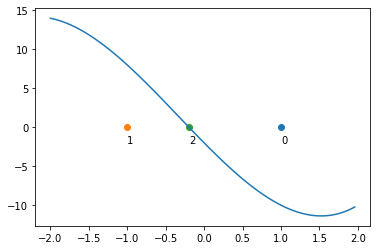

In [16]:
# Newton Verfahren
# In: float x_0, function f, Jakobi Matrix von f A, int max_iterations
# Out: x_k
def newton_verfahren(x_0, f, jakobimatrix, max_iterations):
  x_k = x_0
  for k in range(0, max_iterations):
    delta_x = np.linalg.solve(np.array([[jakobimatrix(x_k)]]), np.array([-f(x_k)]))
    x_k = x_k + delta_x
  return x_k

# Beispiel mit Plot
# Einstellbare Parameter
def sample_function(x):
  return x ** 3 + x ** 2 - 10*x - 2

def ableitung_sample_function(x):
  return 3 * x ** 2 + 2* x - 10

plot_range = np.arange(-2, 2, 0.04)
x = 1

# Plotting Code
plt.plot(plot_range, np.vectorize(sample_function)(plot_range))
plt.scatter(x, 0)
plt.text(x, -2, str(0))
for i in range(1, 3):
  x = newton_verfahren(x, sample_function, ableitung_sample_function, i)
  plt.scatter(x, 0)
  plt.text(x, -2, str(i))
plt.show()

# Kapitel 4 Lineare Auslgeichsrechnung

Für diese Kapitel gilt $A \in \R^{m \times n}, b \in R^m \land m \geq n$

Die Lösung eines solchen LGS kann man berechnen durch $x = (A^tA)^{-1}A^tb$. Man kann häufig die Cholesky Zerlegung um $A^tA x = A^tb$ zu lösen. Alternativ kann man die QR Zerlegung für lineare Ausgleichsrechnungen nutzen.

Hier wird die QR Zerlegung mit Householder Spiegelungen umgesetzt

In [17]:
# QR Zerlegung mit Householder (Nicht Inplace) (nicht optimiert, geht nur ums Konzept)
# In: Matrix A (wird mutiert, enthält aber nicht das Ergebnis)
# Out: Matrix VVektoren v aus denen die Householdermatritzen gebildet werden können und die obere Dreiecksmatrix R
def qr_householder_zerlegung(A):
  m, n = A.shape
  Q, R = np.identity(m), np.zeros(A.shape)
  HA = A
  for i in range(0, n):
    a = HA[i:m, i]
    R[i, i] = (1 if a[0] < 0 else -1) * np.linalg.norm(a)
    b = R[i, i] * np.identity(m-i)[0]
    v_tmp = a - b
    v = v_tmp.reshape((-1, 1)) # Caste Vektor in Spaltenvektor um
    alpha = 2. / BLAS.ddot(v_tmp, v_tmp)
    H = np.identity(m)
    H[i:m, i:m] = H[i:m, i:m] - alpha * v.dot(v.transpose())
    HA = H.dot(HA)
    R[i, i+1:n] = HA[i, i+1:n]
    Q = H.dot(Q)
  return Q.transpose(), R
# Beispiel
sample_A = np.array([[1, 2], [1, 3], [1, 4], [1,5]])
Q, R = qr_householder_zerlegung(sample_A)
print(f"Die QR Zerlegung von A ist Q = \n{Q}\nR=\n{R}")
print(f"Double Check A = QR = \n{Q.dot(R)}")

Die QR Zerlegung von A ist Q = 
[[-0.5         0.67082039  0.0236068   0.5472136 ]
 [-0.5         0.2236068  -0.43934466 -0.71202266]
 [-0.5        -0.2236068   0.80786893 -0.21759547]
 [-0.5        -0.67082039 -0.39213107  0.38240453]]
R=
[[-2.         -7.        ]
 [ 0.         -2.23606798]
 [ 0.          0.        ]
 [ 0.          0.        ]]
Double Check A = QR = 
[[1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


# Kapitel 5 Polynominterpolation

Klassische Polynombasen

In [18]:
# Monomiale Basis
def phi_m(t, i):
  return t**i

# Newton Basis
def phi_n(t, stuetzstellen, i):
  if i == 0:
    return 1
  tmp = 1
  for i in range(0, i):
    tmp *= (t - stuetzstellen[i])
  return tmp

# unnormierte Lagrange Basis
def phi_l(t, stuetzstellen, i):
  tmp = 1
  for j in range(0, stuetzstellen.size):
    if i != j:
      tmp *= (t - stuetzstellen[j])
  return tmp

# normierte Lagrange Basis
def phi_l_normiert(t, stuetzstellen, i):
  zaehler = 1
  nenner = 1
  for j in range(0, stuetzstellen.size):
    if i != j:
      zaehler *= (t - stuetzstellen[j])
      nenner *= (stuetzstellen[i] - stuetzstellen[j])
  return zaehler / nenner


Beispiele zum Interpolieren eines Polynoms mit den obigen Basen und vorgegebenen Stützstellen und Werten.

In [19]:
# Konfigurierbare Eingabedaten
# Die folgenden Beispiele zur Interpolation nutzen diese Eingangsdaten.
inputs = np.array([[-1, 1], [0, -1], [1, -0.5], [2, 1], [3, 1]])

In [20]:
# monomiale Basis
# In: Liste von x,y Wertepaaren
plt.scatter(inputs[:, 0], inputs[:, 1])

# Erstelle Lineares Gleichungssystem Mx = b
n = inputs.shape[0]
t = inputs[:, 0]
b = inputs[:, 1]
A = np.zeros((n, n))
for i in range(0, n):
  for j in range(0, n):
    A[i, j] = phi_m(t[i], j)
c = np.linalg.solve(A, b)
print(f"A = \n{A},\n b = \n{b}\nc = \n{c}")
# Werte interpolierts Polynom aus und zeiche es in den Graphen
def auswerten_monomial(x):
  k = 0
  n = c.size
  for i in range(0, n):
    k += c[i] * x ** i
  return k
plot_range = np.arange(-1.5, 3.6, 0.1)
plt.plot(plot_range, np.vectorize(auswerten_monomial)(plot_range))
plt.show()

A = 
[[ 1. -1.  1. -1.  1.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  2.  4.  8. 16.]
 [ 1.  3.  9. 27. 81.]],
 b = 
[ 1.  -1.  -0.5  1.   1. ]
c = 
[-1.         -0.58333333  1.29166667 -0.16666667 -0.04166667]


In [21]:
# newton Basis
# In: Liste von x,y Wertepaaren
plt.scatter(inputs[:, 0], inputs[:, 1])

# Erstelle Lineares Gleichungssystem Mx = b, wobei M untere Dreiecksmatrix
n = inputs.shape[0]
t = inputs[:, 0]
b = inputs[:, 1]
A = np.zeros((n, n))
for i in range(0, n):
  for j in range(0, n):
    A[i, j] = phi_n(t[i], t, j)
print(f"A = \n{A},\n b = \n{b} \nc = \n{c}")
c = np.linalg.solve(A, b)
# Werte interpolierts Polynom aus und zeiche es in den Graphen
def auswerten_newton(x):
  k = 0
  n = c.size
  for i in range(0, n):
    k += c[i] * phi_n(x, t, i)
  return k
plot_range = np.arange(-1.5, 3.6, 0.1)
plt.plot(plot_range, np.vectorize(auswerten_newton)(plot_range))
plt.show()

A = 
[[ 1.  0. -0.  0. -0.]
 [ 1.  1.  0. -0.  0.]
 [ 1.  2.  2.  0. -0.]
 [ 1.  3.  6.  6.  0.]
 [ 1.  4. 12. 24. 24.]],
 b = 
[ 1.  -1.  -0.5  1.   1. ] 
c = 
[-1.         -0.58333333  1.29166667 -0.16666667 -0.04166667]


In [22]:
# unnormierte Lagrange Basis
# In: Liste von x,y Wertepaaren
plt.scatter(inputs[:, 0], inputs[:, 1])

# Erstelle Lineares Gleichungssystem Mx = b, wobei M untere Dreiecksmatrix
n = inputs.shape[0]
t = inputs[:, 0]
b = inputs[:, 1]
A = np.zeros((n, n))
for i in range(0, n):
  for j in range(0, n):
    A[i, j] = phi_l(t[i], t, j)
print(f"A = \n{A},\n b = \n{b}\nc = \n{c}")
c = np.linalg.solve(A, b)
# Werte interpolierts Polynom aus und zeiche es in den Graphen
def auswerten_lagrange(x):
  k = 0
  n = c.size
  for i in range(0, n):
    k += c[i] * phi_l(x, t, i)
  return k
plot_range = np.arange(-1.5, 3.6, 0.1)
plt.plot(plot_range, np.vectorize(auswerten_lagrange)(plot_range))
plt.show()

A = 
[[24. -0. -0. -0. -0.]
 [-0. -6.  0.  0.  0.]
 [ 0.  0.  4. -0. -0.]
 [-0. -0. -0. -6.  0.]
 [ 0.  0.  0.  0. 24.]],
 b = 
[ 1.  -1.  -0.5  1.   1. ]
c = 
[ 1.         -2.          1.25       -0.25       -0.04166667]


A = 
[[ 1.  0. -0.  0. -0.]
 [-0.  1.  0. -0.  0.]
 [ 0. -0.  1.  0. -0.]
 [-0.  0. -0.  1.  0.]
 [ 0. -0.  0. -0.  1.]],
 b = 
[ 1.  -1.  -0.5  1.   1. ]
c=
[ 0.04166667  0.16666667 -0.125      -0.16666667  0.04166667]


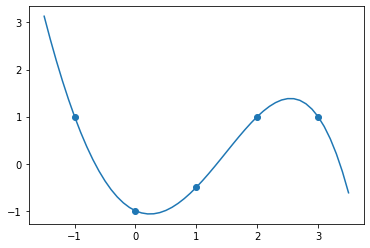

In [23]:
# normierte Lagrange Basis
# In: Liste von x,y Wertepaaren
plt.scatter(inputs[:, 0], inputs[:, 1])

# Erstelle Lineares Gleichungssystem Mx = b, wobei M untere Dreiecksmatrix
n = inputs.shape[0]
t = inputs[:, 0]
b = inputs[:, 1]
A = np.zeros((n, n))
for i in range(0, n):
  for j in range(0, n):
    A[i, j] = phi_l_normiert(t[i], t, j)
print(f"A = \n{A},\n b = \n{b}\nc=\n{c}")
c = np.linalg.solve(A, b)
# Werte interpolierts Polynom aus und zeiche es in den Graphen
def auswerten_lagrange_normiert(x):
  k = 0
  n = c.size
  for i in range(0, n):
    k += c[i] * phi_l_normiert(x, t, i)
  return k
plot_range = np.arange(-1.5, 3.6, 0.1)
plt.plot(plot_range, np.vectorize(auswerten_lagrange_normiert)(plot_range))
plt.show()

## Weiter Algorithmen zum Berechnen

In [24]:
# Konfigurierbare Eingabedaten
# Die folgenden Beispiele zur Interpolation nutzen diese Eingangsdaten.
inputs = np.array([[-1, 1], [0, -1], [1, -0.5], [2, 1], [3, 1]])

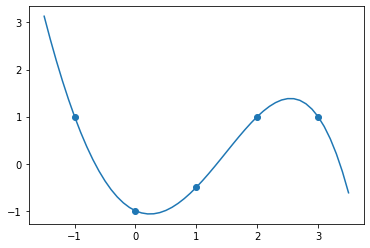

In [25]:
# dividierte Differenzen und die Newton Basis. Berechne die Koeffizienten ohne Aufstellen von Matrix M
# In: Vektor p, Stützstellen t
# Out: Koeffizienten c werden in p gespeichert
def dividierte_differenzen(p, t):
  c = p
  I = p.size
  for i in range(0, I-1):
    for j in range(I-1, i, -1):
      c[j] = (c[j] - c[j-1]) / (t[j] - t[j-i-1])


# Rendere Graphen vom Bsp.
plt.scatter(inputs[:, 0], inputs[:, 1])
n = inputs.shape[0]
t = inputs[:, 0]
p = inputs[:, 1].copy() # kopiere um nicht nachfolgende Beispiele abzuändern
dividierte_differenzen(p, t)
def auswerten_newton(x):
  k = 0
  n = c.size
  for i in range(0, n):
    k += p[i] * phi_n(x, t, i)
  return k
plot_range = np.arange(-1.5, 3.6, 0.1)
plt.plot(plot_range, np.vectorize(auswerten_newton)(plot_range))
plt.show()

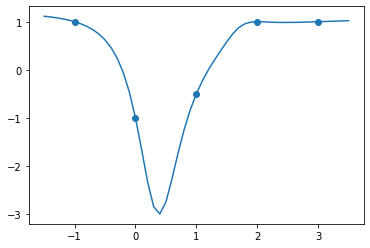

In [26]:
# Baryzentrische Interpolationsformel

# Zuerst Berechne die Gewichte w_i
# In: Stuetzstellen t
# Out: Gewichte w
def berechne_gewichte_baryzentrische_interpolation(t):
  n = t.size
  w = np.ones(n)
  for i in range(0, n):
    for j in range(0, n):
      if i != j:
        w[i] *= (t[i] - t[j])
  return w

# Jetzt Interpoliere mit den Gewichten (Nutze eine Factory um Graphen leichter zu rendern)
# In: Gewichte w, Stützstellen t, Auswertungen p, Float x
# Out: Float P(x)
def baryzentrische_interpolationsformel_factory(w, t, p):
  I = t.size -1
  def baryzentrische_interpolationsformel(x):
    nenner = 0
    zaehler = 0
    for i in range(0, I+1):
      if abs(x - t[i]) < 10 ** -17:
        return p[i]
      tmp = w[i] / (x - t[i])
      zaehler += tmp * p[i]
      nenner += tmp
    return zaehler / nenner
  return baryzentrische_interpolationsformel

# Rendere Graphen vom Bsp.
plt.scatter(inputs[:, 0], inputs[:, 1])
n = inputs.shape[0]
t = inputs[:, 0]
p = inputs[:, 1] # kopiere um nicht nachfolgende Beispiele abzuändern
w = berechne_gewichte_baryzentrische_interpolation(t)
plot_range = np.arange(-1.5, 3.6, 0.1)
plt.plot(plot_range, np.vectorize(baryzentrische_interpolationsformel_factory(w, t, p))(plot_range))
plt.show()

# Kapitel 6 Interpolation von Funktionen 

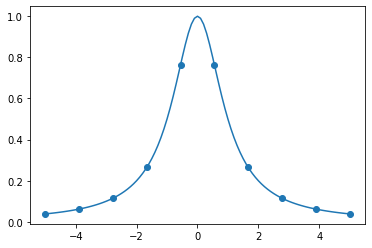

In [27]:
# konfigurierbare 

# Konfigurierbare Eingabedaten
# Die folgenden Beispiele zur Interpolation nutzen diese Eingangsdaten.
anzahl_aequidistante_stuetzstellen = 10

def sample_function(x):
  return 1. / (1. + x**2)

sample_function = np.vectorize(sample_function)
aequidistante_stuetzstellen = np.linspace(-5, 5, anzahl_aequidistante_stuetzstellen)
inputs = np.vstack((aequidistante_stuetzstellen, sample_function(aequidistante_stuetzstellen))).transpose()
plot_range = np.arange(-5, 5.1, 0.1)
plt.plot(plot_range, sample_function(plot_range))
plt.scatter(aequidistante_stuetzstellen, sample_function(aequidistante_stuetzstellen))
plt.show()

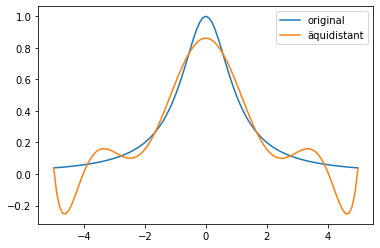

In [28]:
# Hilfe Funktion, welche die Koeffizienten berechnet
# In: Inputs = Paare von t, p
def interpolation_factory(inputs):
  t, p = inputs[:, 0], inputs[:, 1]
  n = p.size
  A = np.zeros((n, n))
  for i in range(0, n):
    for j in range(0, n):
      A[i, j] = phi_l(t[i], t, j)
  c = np.linalg.solve(A, p)

  def auswerten_lagrange(x):
    k = 0
    n = c.size
    for i in range(0, n):
      k += c[i] * phi_l(x, t, i)
    return k
  return np.vectorize(auswerten_lagrange)

# Beispielrender
interpolation = interpolation_factory(inputs)
plt.plot(plot_range, sample_function(plot_range), label="original")
plt.plot(plot_range, interpolation(plot_range), label="äquidistant")
plt.legend()
plt.show()


## Minimiere Fehler durch optimale Knotenwahl

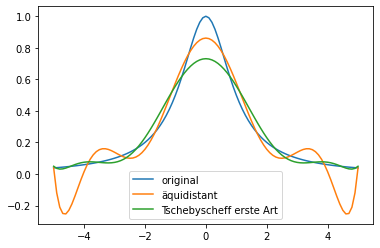

In [29]:
# In: Gewünschter Grad N, Intervallstart a, Intervallende b
# Out: Array mit N+1 Knoten
def tschebyscheffknoten_erster_art(n, a, b):
  t = np.zeros(n+1)
  for i in range(0, n+1):
    t[i] = a + (b - a)/2. *(math.cos((i+0.5)/(n+1) * math.pi) + 1)
  return t

# Berechne jetzt die Tschebyscheff Knoten
t = tschebyscheffknoten_erster_art(9, -5, 5)
inputs_tschebyscheff = np.vstack((t, sample_function(t))).transpose()

interpolation = interpolation_factory(inputs)
interpolation_tschebyscheff = interpolation_factory(inputs_tschebyscheff)
plt.plot(plot_range, sample_function(plot_range), label="original")
plt.plot(plot_range, interpolation(plot_range), label="äquidistant")
plt.plot(plot_range, interpolation_tschebyscheff(plot_range), label="Tschebyscheff erste Art")
plt.legend()
plt.show()

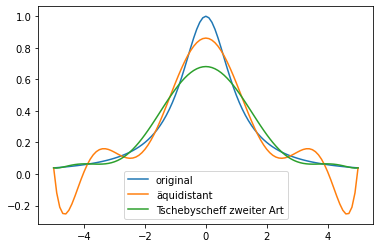

In [30]:
# In: Gewünschter Grad N, Intervallstart a, Intervallende b
# Out: Array mit N+1 Knoten
def tschebyscheffknoten_zweiter_art(n, a, b):
  t = np.zeros(n+1)
  for i in range(0, n+1):
    t[i] = a + (b - a)/2. *(math.cos((i)/(n) * math.pi) + 1)
  return t

# Berechne jetzt die Tschebyscheff Knoten
t = tschebyscheffknoten_zweiter_art(9, -5, 5)
inputs_tschebyscheff = np.vstack((t, sample_function(t))).transpose()

interpolation = interpolation_factory(inputs)
interpolation_tschebyscheff = interpolation_factory(inputs_tschebyscheff)
plt.plot(plot_range, sample_function(plot_range), label="original")
plt.plot(plot_range, interpolation(plot_range), label="äquidistant")
plt.plot(plot_range, interpolation_tschebyscheff(plot_range), label="Tschebyscheff zweiter Art")
plt.legend()
plt.show()

## Stückweise Interpolation

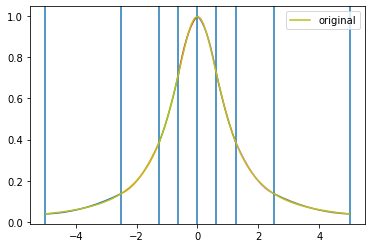

In [31]:
# Adaptive Stückweise Interpolation der Funktion sample_f auf dem Intervall -5, 5. Interpoliere mit Polynomen vom Grad 2
# Bei dieser Implementierung wird auf Caching der Zwischenergebnisse Verzichtet
# In: 0 < rho <= 1, Möglichster Fehler epsilon <1, Startpunkt a, Endpunkt b
# Out: Intervalle und die Ausgewerteten Werte für den Graphen
def adaptiver_algorithmus(rho, epsilon):
  e_max = 1
  intervals = [-5, 5]
  auswertungen = np.zeros(0)
  while True:
    # Interpoliere die Funktion auf den Teilintervallen und speichere die Auswertungen und die Intervalle
    errors = np.ones(len(intervals) - 1)
    auswertungen = np.zeros((10, len(intervals) - 1))
    for i in range(0, len(intervals) -1):
      t = np.linspace(intervals[i], intervals[i+1], 3) # Berechne die Stützstellen für das Subintervall intervals[i]
      inputs = np.vstack((t, sample_function(t))).transpose()
      interpolation = interpolation_factory(inputs)
      auswertungsstellen_im_intervall = np.linspace(t[0], t[2], 10)
      auswertungen[:, i] =  interpolation(auswertungsstellen_im_intervall)
      auswertungsfehler = np.abs(sample_function(auswertungsstellen_im_intervall) - auswertungen[:, i])
      errors[i] = np.max(auswertungsfehler)
    # Halbiere alle Intervalle 
    e_max = np.max(errors)
    if e_max < epsilon:
      break
    offset = 0 # füge Offset hinzu um die neuen Elemente in intervals zu berücksichtigen
    for i in range(0, len(intervals)-1):
      if (errors[i] > rho * e_max):
        intervals.insert(i + offset + 1, (intervals[i+offset] + intervals[i+1+offset])/2)
        offset += 1
  return intervals, auswertungen

# Beispiel
intervals, auswertungen = adaptiver_algorithmus(0.9, 0.01)
# Zeichne die Auswertungen in den Graphen
for i in range(0, len(intervals)-1):
  t = np.linspace(intervals[i], intervals[i+1], 10)
  plt.plot(t, auswertungen[:, i])
# Zeiche die Intervalle ein
for i in intervals:
  plt.axvline(x=i)
plt.plot(plot_range, sample_function(plot_range), label="original")
plt.legend()
plt.show()


# Kapitel 7 Quadraturen



In [32]:
# Konfiguierbare Eingaben
def sample_function(x):
  return 1. / (1. + (x+0.5)**2)

# Mache die Konfiguration leichter Nutzbar für folgende Zellen
sample_function = np.vectorize(sample_function)
plot_range = np.arange(-2, 2, 0.1)
org_plot = sample_function(plot_range)
# Definiere Helfer Funktionen
def interpolation_lagrange_normiert_factory(inputs):
  t, p = inputs[:, 0], inputs[:, 1]
  n = p.size
  A = np.zeros((n, n))
  for i in range(0, n):
    for j in range(0, n):
      A[i, j] = phi_l_normiert(t[i], t, j)
  c = np.linalg.solve(A, p)

  def auswerten_lagrange(x):
    k = 0
    n = c.size
    for i in range(0, n):
      k += c[i] * phi_l_normiert(x, t, i)
    return k
  return np.vectorize(auswerten_lagrange)

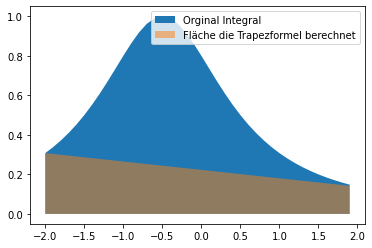

Berechnete Fläche der Trapezregel ist 0.8912466843501327


In [33]:
# Trapezregel
# In: Funktion f, Startpunkt a, Endpunkt b
# Out: Berechnete Fläche
def trapezregel(f, a, b):
  return (b - a)/2. * (f(a) + f(b))

def draw_trapez_flaeche(f, x, a, b):
  interval_size = float(b - a)
  return f(a) + (f(b) - f(a)) * ((x-a) / interval_size)

draw_trapez_flaeche = np.vectorize(draw_trapez_flaeche)
plt.fill_between(plot_range, org_plot, label="Orginal Integral")
plt.fill_between(plot_range, draw_trapez_flaeche(sample_function, plot_range, -2, 2), label="Fläche die Trapezformel berechnet", alpha=0.5)
plt.legend()
plt.show()
print(f"Berechnete Fläche der Trapezregel ist {trapezregel(sample_function, -2, 2)}")

Um die Genauigkeit zu Verbessern kann die Anzahl der Stützstellen erhöht werden.

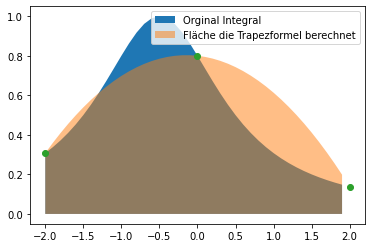

Berechnete Fläche der Trapezregel ist 2.3324491600353667


In [34]:

# Keplersche Fassregel
# In: Funktion f, Startpunkt a, Endpunkt b
# Out: Berechnete Fläche
def keplersche_fassregel(f, a, b):
  return (b-a)/2. + (1./3. * f(a) + 4./3. * f((b-a)/2.) + 1./3. * f(b))

t = np.array([[-2, 0, 2]])
inputs = np.vstack((t, sample_function(t))).transpose()
interpolation = interpolation_lagrange_normiert_factory(inputs)
plt.fill_between(plot_range, org_plot, label="Orginal Integral")
plt.fill_between(plot_range, interpolation(plot_range), label="Fläche die Trapezformel berechnet", alpha=0.5)
plt.scatter(inputs[:, 0], inputs[:, 1])
plt.legend()
plt.show()
print(f"Berechnete Fläche der Trapezregel ist {keplersche_fassregel(sample_function, -2, 2)}")

Alternativ kann anstatt die Stützstellenanzahl zu erhöhen das Intervall aufgeteilt werden. Es gibt dazu einen Algorithmus analog zur Stückweisen Interpolation.
In diesem Codeschnipsel wird wird das Intervall in 4 Teile aufgeteilt und gezeichnet.

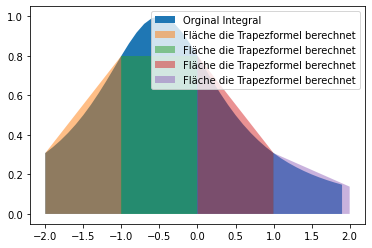

Berechnete Fläche der Trapezregel ist 2.1305039787798408


In [35]:
# Trapezregel
# In: Funktion f, Startpunkt a, Endpunkt b
# Out: Berechnete Fläche
def trapezregel(f, a, b):
  return (b - a)/2. * (f(a) + f(b))

def draw_trapez_flaeche(f, x, a, b):
  interval_size = float(b - a)
  return f(a) + (f(b) - f(a)) * ((x-a) / interval_size)

draw_trapez_flaeche = np.vectorize(draw_trapez_flaeche)
plt.fill_between(plot_range, org_plot, label="Orginal Integral")
plt.fill_between(np.linspace(-2, -1, 10), draw_trapez_flaeche(sample_function, np.linspace(-2, -1, 10), -2, -1), label="Fläche die Trapezformel berechnet", alpha=0.5)
plt.fill_between(np.linspace(-1, 0, 10), draw_trapez_flaeche(sample_function, np.linspace(-1, 0, 10), -1, 0), label="Fläche die Trapezformel berechnet", alpha=0.5)
plt.fill_between(np.linspace(0, 1, 10), draw_trapez_flaeche(sample_function, np.linspace(0, 1, 10), 0, 1), label="Fläche die Trapezformel berechnet", alpha=0.5)
plt.fill_between(np.linspace(1, 2, 10), draw_trapez_flaeche(sample_function, np.linspace(1, 2, 10), 1, 2), label="Fläche die Trapezformel berechnet", alpha=0.5)
plt.legend()
plt.show()
print(f"Berechnete Fläche der Trapezregel ist {trapezregel(sample_function, -2, -1) + trapezregel(sample_function, -1, 0) + trapezregel(sample_function, 0, 1) + trapezregel(sample_function, 1, 2)}")

# Kapitel 8 FFT

In [83]:
# TODO
import cmath
# In: Int k, a Vektor mit 2k Elementen, w aus den Komplexen Zahlen
def fft(k, a, w):
  if k == 0:
    return a[0]
  m = 2 ** (k-1)
  b = np.zeros(m)
  c = np.zeros(m)
  for j in range(0, m):
    b[j] = a[j] + a[m+j]
    c[j] = (a[j] - a[m+j]) * (w**j)
  u = fft(k-1, b, w**2)
  v = fft(k-1, c, w**2)
  y = np.zeros(2*m)
  for i in range(0, m):
    y[2*i] = u[i]
    y[2*i+1] = v[i]
  return y


# Kapitel 9 Spline Interpolation

Implementiere die lineare Spline Interpolation mit der Hütchenbasis

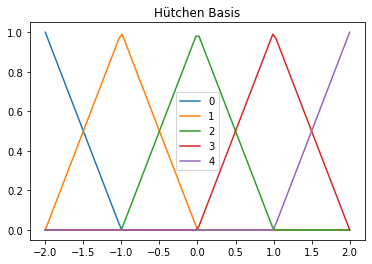

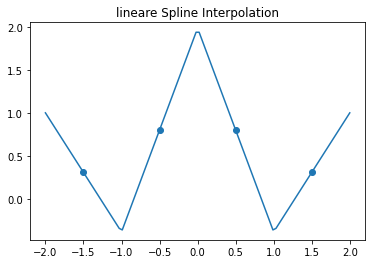

In [82]:
def sample_function(x):
  return 1./(1+x**2)

# Berechne die Koeffizienten
sample_function = np.vectorize(sample_function)
intervallgrenzen = [-2, -1, 0, 1, 2]
start_bedingung = 1
t = np.array([-1.5, -0.5, 0.5, 1.5])
auswertungen = sample_function(t)
A = np.zeros((5, 5))
for i in range(0, 4):
  A[i, i] = 1./2.
  A[i, i+1] = 1./2.
A[4, 0] = 1
p = np.hstack((auswertungen, start_bedingung))
c = np.linalg.solve(A, p)

# definiere die Basen
def phi_h(x, i):
  if i == 0:
    if x < intervallgrenzen[i+1]:
      return (x - intervallgrenzen[i+1]) / float(intervallgrenzen[i] - intervallgrenzen[i+1])
    return 0.
  if i == 4: 
    if x > intervallgrenzen[i-1]:
      return (x - intervallgrenzen[i-1]) / float(intervallgrenzen[i] - intervallgrenzen[i-1])
    return 0.
  if x > intervallgrenzen[i-1] and x < intervallgrenzen[i+1]:
    if x < intervallgrenzen[i]:
      return (x - intervallgrenzen[i-1]) / float(intervallgrenzen[i] - intervallgrenzen[i-1])
    else:
      return (x - intervallgrenzen[i+1]) / float(intervallgrenzen[i] - intervallgrenzen[i+1])
  return 0.
phi_h = np.vectorize(phi_h)
# Plotte Hütechen Basis
plt.title("Hütchen Basis")
plt.plot(np.linspace(-2, 2, 100), phi_h(np.linspace(-2, 2, 100), 0), label="0")
plt.plot(np.linspace(-2, 2, 100), phi_h(np.linspace(-2, 2, 100), 1), label="1")
plt.plot(np.linspace(-2, 2, 100), phi_h(np.linspace(-2, 2, 100), 2), label="2")
plt.plot(np.linspace(-2, 2, 100), phi_h(np.linspace(-2, 2, 100), 3), label="3")
plt.plot(np.linspace(-2, 2, 100), phi_h(np.linspace(-2, 2, 100), 4), label="4")
plt.legend()
plt.show()

# definiere Auswertung
def auswertung_spline(x):
  res = 0
  for i in range(0, 5):
    res += phi_h(x, i) * c[i]
  return res
auswertung_spline = np.vectorize(auswertung_spline)
plt.title("lineare Spline Interpolation")
plt.scatter(t, auswertungen)
plt.plot(np.linspace(-2, 2, 100), auswertung_spline(np.linspace(-2, 2, 100)))
plt.show()